# Examples Chaining search
This notebook contains a number of examples of chaining linguistic resources: corpora, lexica and treebanks. Try the examples, or copy the code and customize the examples in the [Sandbox](Sandbox.ipynb).


## List of examples
### Corpora
 * [Corpus search](#corpus-search)
 * [Frequency of *zeker*+verb and *vast*+verb compared](#freq-puur-zuiver)
 * [Train a POS tagger on an annotated corpus](#pos-tagger)
 * [Search in corpus and filter on metadata](#corpus-filter-metadata)
 * [Visualizing h-dropping](#visualizing-h-dropping)
 * [Generate lexicon from several corpora](#lexicon-several-corpora)

### Lexica
 * [Lexicon search](#lexicon-search)

### Corpus + lexicon
 * [Retrieve synonyms from DiaMaNT, look up in Gysseling](#synonyms-diamant-gysseling)
 * [Build a frequency list of the lemma of some corpus output](#freq-lemma-corpus)
 * [Find occurences of attributive adjectives not ending with -e, even though they are preceeded by a definite article](#adjective-e)
 * [Look up inflected forms and spelling variants for a given lemma in a corpus](#inflected-spelling-corpus)
 * [Corpus frequency list of lemmata from lexicon with given lemma](#corpus-frequency-lemma-pos)
 * [Build a frequency table of some corpus, based on lemmata of a given lexicon](#freqtable-lemmalist)
 * [Search corpus for wordforms of lemma not included in lexicon](#corpus-wordforms-not-lexicon)
 
### Treebanks
 * [Treebank search](#treebank-search)
 * [Which objects of verb *geven* occur?](#treebank-objects-geven)
 ---

## Corpus

### Corpus search <a class="anchor" id="corpus-search"></a>

* Run the cell below to show the UI, and fill in your search query

In [1]:
from chaininglib.ui.search import create_corpus_ui

# Create corpus UI, creates references to field contents
corpusQueryField, corpusField = create_corpus_ui()


 * Click the cell below and press Run to perform the given query

In [3]:
from chaininglib.search.CorpusQuery import *
from chaininglib.ui.dfui import display_df

#from chaininglib import search
query= corpusQueryField.value
corpus_name = corpusField.value
df_corpus = create_corpus(corpus_name).pattern(query).search().kwic()
#df_corpus = load_dataframe('mijn_resultaten.csv')
display_df(df_corpus, labels="Results")



,left context,lemma 0,pos 0,word 0,right context
0,het te koop in de,boekwinkel,"NOU-C(gender=f|m,number=sg)",boekwinkel,op Bonaire De verschrikkelijke sneeuwman
1,De,boekwinkel,"NOU-C(gender=f|m,number=sg)",boekwinkel,van Addo Stuur is nu
2,te koop in de Curaçaose,boekwinkel,NOU-C(number=pl),boekwinkels,Er is ook een Facebookpagina
3,te koop in de Curaçaose,boekwinkel,NOU-C(number=pl),boekwinkels,Voor het stemmen gedurende de
4,verkopen Het ligt bij alle,boekwinkel,NOU-C(number=pl),boekwinkels,en de recensies zijn lovend
5,Volgens Addo' s zal de,boekwinkel,"NOU-C(gender=f|m,number=sg)",boekwinkel,op de nieuwe locatie ruim
6,in feite de enige echte,boekwinkel,"NOU-C(gender=f|m,number=sg)",boekwinkel,die het eiland rijk is
7,de groten der aarde De,boekwinkel,NOU-C(number=pl),boekwinkels,in Nederland weten George Maduro
8,2006 had gekocht in een,boekwinkel,"NOU-C(gender=f|m,number=sg)",boekwinkel,in de Uruguyaanse hoofdstad Montevideo
9,Langzame doodsstrijd,boekwinkel,NOU-C(number=pl),boekwinkels,Mexico Van onze redactie Mexico-Stad


### Frequency of *zeker*+verb and *vast*+verb compared <a class="anchor" id="freq-puur-zuiver"></a>
* Below cell searches for *zeker*+verb and for *vast*+verb in the Letters as Loot (zeebrieven) corpus
* Compare frequencies

In [ ]:
#from chaininglib import search
from IPython.core.display import display, HTML
from chaininglib.search.CorpusQuery import *
from chaininglib.ui.dfui import display_df
from chaininglib.utils.dfops import column_difference

corpus_name = "zeebrieven"

# Word 1: puur
word1= "zeker"
cq1 = create_corpus(corpus_name).pattern(r'[lemma="' + word1 + r'"][pos="VRB.*"]')
df_corpus1 = cq1.search().kwic()
display_df(df_corpus1, word1)

# Word 2: zuiver
word2 = "vast"
cq2 = create_corpus(corpus_name).pattern(r'[lemma="' + word2 + r'"][pos="VRB.*"]')
df_corpus2 = cq2.search().kwic()
display_df(df_corpus2, word2)

# Compute difference
diff_left, diff_right, intersec = column_difference(df_corpus1["word 1"], df_corpus2["word 1"])
# Elements of 1 that are not in 2
display(HTML('Werkwoorden voor <b>' + word1 + '</b> niet in <b>' + word2 + '</b>: ' + ", ".join(diff_left)))
# Elements of 2 that are not in 1
display(HTML('Werkwoorden voor <b>' + word2 + '</b> niet in <b>' + word1 + '</b>: ' + ", ".join(diff_right)))
# Elements both in 1 and 2
display(HTML('Werkwoorden zowel voor <b>' + word1 + '</b> als voor <b>' + word2 + '</b>: ' + ", ".join(intersec)))

### Train a POS tagger on an annotated corpus <a class="anchor" id="pos-tagger"></a>

In [ ]:
from chaininglib.ui.dfui import display_df
from chaininglib.process.corpus import get_tagger
from chaininglib.search.CorpusQuery import *
from chaininglib.search.LexiconQuery import *

import pandas as pd

# TODO: replace by historical lexicon
base_lexicon="molex"

# we have a given word
some_word = "lopen"

# get the paradigm of the lemma our word is a part of
l = create_lexicon(base_lexicon).lemma(some_word).search()
df_paradigm = l.kwic()
display_df(df_paradigm)

# gather some pattern including our word, out of annotated corpora
# here: DET + ADJ + 'loop'

dfs_all_corpora = []

for one_corpus in get_available_corpora():
    print('querying '+one_corpus+'...')
    c = create_corpus(one_corpus).word(some_word).detailed_context(True).search()
    df_corpus = c.kwic() 
    
    # store the results
    dfs_all_corpora.append(df_corpus)


# get a tagger trained with our corpus data
tagger = get_tagger(dfs_all_corpora, pos_key = 'pos') 

# Use the trained tagger to tag unknown sentences
# The input must be like: tagger.tag(['today','is','a','beautiful','day'])

sentence = 'Zij lopen graag in het bos als het mooi weer is'
tagged_sentence = tagger.tag( sentence.split() )

print(tagged_sentence)


# Know we can lemmatize each occurence of our lemma in the new sentences

### Search in corpus and filter on metadata <a class="anchor" id="corpus-filter-metadata"></a>
First, we request all available metadata fields of the corpus. Then, we issue a search query, and request all metadata fields for the result. Finally, we filter on metadata values.

In [ ]:
from chaininglib.search.metadata import get_available_metadata
from chaininglib.utils.dfops import df_filter, property_freq
from chaininglib.ui.dfui import display_df
from chaininglib.search.CorpusQuery import *


corpus_name="zeebrieven"
query=r'[lemma="boek"]'
# Request all metadata fields from corpus
fields = get_available_metadata(corpus_name)
# Perform query and ask all metadata
c = create_corpus(corpus_name).pattern(query).extra_fields_doc(fields["document"]).search()
df_corpus = c.kwic()

# Filter on year: > 1700
df_filter_year = df_corpus[df_corpus["witnessYear_from"].astype('int32') > 1700] 
display_df(df_filter_year, labels="After 1700")

# Filter on sender birth place Amsterdam
condition = df_filter(df_corpus["afz_geb_plaats"], pattern="Amsterdam")
df_filter_place = df_corpus[ condition ]
display_df(df_filter_place, labels="Sender born in Amsterdam")


# Group by birth place
df = property_freq(df_corpus,"afz_loc_plaats")
display_df(df, labels="Most frequent sender locations")

### Visualizing h-dropping  <a class="anchor" id="visualizing-h-dropping"></a>

In [ ]:

from chaininglib.search.CorpusQuery import *
from chaininglib.search.metadata import get_available_metadata
from chaininglib.ui.dfui import display_df
 
corpus_to_search="zeebrieven"
group_by_column = 'afz_geb_plaats'
 
fields = get_available_metadata(corpus_to_search)
 
df_corpus1 = create_corpus(corpus_to_search).pattern(r'[lemma="h[aeo].*" & word="[aeo].*"]').extra_fields_doc(fields["document"]).search().kwic()
df_corpus2 = create_corpus(corpus_to_search).pattern(r'[lemma="h[aeo].*" & word="h[aeo].*"]').extra_fields_doc(fields["document"]).search().kwic()
 
#display_df( df_corpus1)
#display_df( df_corpus2)
 
display_df( df_corpus1[['lemma 0', group_by_column]].groupby(group_by_column).count().sort_values(ascending=False,by=['lemma 0']).head(25), labels="h-dropping", mode='chart')
display_df( df_corpus2[['lemma 0', group_by_column]].groupby(group_by_column).count().sort_values(ascending=False,by=['lemma 0']).head(25), labels="normal", mode='chart')


### Generate lexicon from several corpora <a class="anchor" id="lexicon-several-corpora"></a>

In [ ]:
from chaininglib.ui.dfui import display_df
from chaininglib.process.corpus import extract_lexicon
from chaininglib.search.CorpusQuery import *

dfs_all_corpora = []
for one_corpus in get_available_corpora(exclude=["nederlab"]):
    print('querying '+one_corpus+'...')
    c = create_corpus(one_corpus).pos("NOU").detailed_context(True).search()
    df_corpus = c.kwic() 
    # store the results
    dfs_all_corpora.append(df_corpus)

    
# extract lexicon and show the result
extracted_lexicon = extract_lexicon(dfs_all_corpora, posColumnName="pos") # For FCS: posColumnName=universal_dependency
display(extracted_lexicon)

## Lexicon

### Lexicon search <a class="anchor" id="lexicon-search"></a>

* Run the cell below to show the UI, and fill in your search query in the UI

In [ ]:
from chaininglib.ui.search import create_lexicon_ui

#from chaininglib import ui
searchWordField, lexiconField = create_lexicon_ui()

 * Click the cell below and press Run to perform the given query

In [ ]:
from chaininglib.search.LexiconQuery import *
from chaininglib.ui.dfui import display_df

search_word = searchWordField.value
lexicon_name = lexiconField.value
# USER: can replace this by own custom query
lex = create_lexicon(lexicon_name).lemma(search_word).search()
df_lexicon = lex.kwic()
display_df(df_lexicon)
#df_columns_list = list(df_lexicon.columns.values)
#df_lexicon_in_columns = df_lexicon[df_columns_list]
#display(df_lexicon_in_columns)

## Corpus + lexicon

### Retrieve synonyms from DiaMaNT, look up in Gysseling <a class="anchor" id="synonyms-diamant-gysseling"></a>
* Below cell searches for term "boek" in DiaMaNT, and looks up all variants in Gysseling

In [ ]:
from chaininglib.search.CorpusQuery import *
from chaininglib.search.LexiconQuery import *
from IPython.core.display import display, HTML
from chaininglib.search.corpusQueries import corpus_query
from chaininglib.process.lexicon import get_diamant_synonyms
from chaininglib.ui.dfui import display_df

search_word = "boek"
lexicon_name = "diamant"
corpus= "gysseling"

# First, lookup synonyms in DiaMaNT
lq = create_lexicon(lexicon_name).lemma(search_word).search()
df_lexicon = lq.kwic()

syns = get_diamant_synonyms(df_lexicon)
syns.add(search_word) # Also add search word itself
display(HTML('Synoniemen voor <b>' + search_word + '</b>: ' + ", ".join(syns)))

# Search for all synonyms in corpus
## Create queries: search by lemma
syns_queries = [corpus_query(lemma=syn) for syn in syns]

## Search for all synonyms in corpus
df = pd.DataFrame()
for one_pattern in syns_queries:
    cq = create_corpus(corpus).pattern(one_pattern).search()
    df = df.append(cq.kwic())
display_df(df)



###  Build a frequency list of the lemma of some corpus output <a class="anchor" id="freq-lemma-corpus"></a>

In [ ]:
from chaininglib.search.CorpusQuery import *
from chaininglib.process.corpus import *
from chaininglib.ui.dfui import *

# do some corpus search

corpus_to_search="zeebrieven"
df_corpus = create_corpus(corpus_to_search).detailed_context(True).pos("NOU.*").search().kwic()
display_df(df_corpus)

# compute and display a table of the frequencies of the lemmata

freq_df = get_frequency_list(df_corpus)
display_df(freq_df)

### Find occurences of attributive adjectives not ending with -e, even though they are preceeded by a definite article <a class="anchor" id="adjective-e"></a>

In [8]:
from chaininglib.search.CorpusQuery import *
from chaininglib.search.LexiconQuery import *
from chaininglib.utils.dfops import df_filter
from chaininglib.ui.dfui import display_df

corpus_to_search="chn-extern"
lexicon_to_search="molex"

# CORPUS: get [article + attributive adjective + nouns] combinations in which the adjective does not end with -e
print('Get occurences of attributive adjectives not ending with -e')
cq = create_corpus(corpus_to_search).pattern(r'[lemma="de|het"][word="^g(.+)[^e]$" & pos="AA.*"][pos="NOU.*"]')
df_corpus = cq.search().kwic()
display(df_corpus)

# LEXICON: get adjectives the lemma of which does not end with -e
lq = create_lexicon(lexicon_to_search).lemma('^g(.+)[^e]$').pos('ADJ').search()
df_lexicon = lq.search().kwic()

# LEXICON: get adjectives having a final -e in definite attributive use
print('Filtering lexicon results')
final_e_condition = df_filter(df_lexicon["wordform"], 'e$')
df_lexicon_form_e = df_lexicon[ final_e_condition ]

# RESULT: get the records out of our first list in which the -e-less-adjectives match the lemma form of our last list
print('List of attributive adjectives not ending with -e even though they should have a final -e:')
e_forms = list(df_lexicon_form_e.lemma)
no_final_e_condition = df_filter(df_corpus["word 1"], pattern=set(e_forms), method="isin")
result_df = df_corpus[ no_final_e_condition ]
display_df( result_df )

Get occurences of attributive adjectives not ending with -e
                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                    

,left context,lemma 0,pos 0,word 0,lemma 1,pos 1,word 1,lemma 2,pos 2,word 2,right context
0,van Duijneveldt met The Unborn,het,"PD(type=d-p,subtype=art-def)",het,gouden,"AA(degree=pos,position=prenom)",gouden,ei,"NOU-C(gender=n,number=sg)",ei,symbool van hoop en belofte
1,s get wild edition heet,het,"PD(type=pers,person=3,gender=n,number=sg,position=pron)",het,gratis,"AA(degree=pos,position=adv|pred)",gratis,flip,NOU-P(part-of-multiword=true),Flip,Flop-muziekevenement dat op zondag 9
2,lekker snoepen van alles wat,de,"PD(type=d-p,subtype=art-def)",de,goedheilig,"AA(degree=pos,position=prenom)",goedheilig,man,"NOU-C(gender=f|m,number=sg)",man,uitdeelt Oh ja en dan
3,Freeport een geldbedrag uitlooft voor,de,"PD(type=d-p,subtype=art-def)",de,gouden,"AA(degree=pos,position=prenom)",gouden,tip,"NOU-C(gender=f|m,number=sg)",tip,zo vertelt eigenaar Mahesh Mukti
4,plaatste vervolgens een foto van,het,"PD(type=d-p,subtype=art-def)",het,vinden,"AA(position=prenom,degree=pos)",gevonden,toestel,"NOU-C(gender=n,number=sg)",toestel,op Twitter in de hoop
5,dollar Dit ijsje kwam in,het,"PD(type=d-p,subtype=art-def)",het,Guinness,"AA(degree=pos,position=prenom)",Guinness,boek,"NOU-C(gender=n,number=sg)",Boek,van Wereldrecords Het werd echter
6,het in ontvangst nemen van,de,"PD(type=d-p,subtype=art-def)",de,gouden,"AA(degree=pos,position=prenom)",gouden,schoen,"NOU-C(gender=f|m,number=sg)",schoen,voor zijn 50 doelpunten afgelopen
7,stap om de kip met,de,"PD(type=d-p,subtype=art-def)",de,gouden,"AA(degree=pos,position=prenom)",gouden,ei,NOU-C(number=pl),eieren,te slachten en dat heeft
8,van de uiterst lucratieve slavenhandel,de,"PD(type=d-p,subtype=art-def)",De,gouden,"AA(degree=pos,position=prenom)",gouden,eeuw,"NOU-C(gender=f|m,number=sg)",eeuw,gebouwd op zwart goud Complete
9,de leeftijdscategorie 13-15 jaar ging,de,"PD(type=d-p,subtype=art-def)",de,gouden,"AA(degree=pos,position=prenom)",gouden,medaille,"NOU-C(gender=f|m,number=sg)",medaille,naar Abigail de Veer De


Filtering lexicon results                                                                                                                                                                                                                                                       
List of attributive adjectives not ending with -e even though they should have a final -e:


,left context,lemma 0,pos 0,word 0,lemma 1,pos 1,word 1,lemma 2,pos 2,word 2,right context
2,lekker snoepen van alles wat,de,"PD(type=d-p,subtype=art-def)",de,goedheilig,"AA(degree=pos,position=prenom)",goedheilig,man,"NOU-C(gender=f|m,number=sg)",man,uitdeelt Oh ja en dan
10,onvoorwaardelijk gesteund door hulpverleners in,het,"PD(type=d-p,subtype=art-def)",het,gesloten,"AA(position=prenom,degree=pos)",gesloten,instituut,"NOU-C(gender=n,number=sg)",instituut,voor jongeren met gedragsproblemen waarin
17,vier spirituele wetten zijn vergiffenis,het,"PD(type=d-p,subtype=art-def)",het,goddelijk,"AA(degree=pos,position=prenom)",goddelijk,doel,"NOU-C(gender=n,number=sg)",doel,doelen stellen in het leven
18,het museum ter ere van,de,"PD(type=d-p,subtype=art-def)",de,geestelijk,"AA(degree=pos,position=prenom)",geestelijk,vader,"NOU-C(gender=f|m,number=sg)",vader,van de fictieve indiaan Winnetou
26,van de jouvers die daarmee,de,"PD(type=d-p,subtype=art-def)",de,gebroken,"AA(position=prenom,degree=pos)",gebroken,nacht,"NOU-C(gender=f|m,number=sg)",nacht,hadden overleefd Tegen acht uur
27,om gegevens te verstrekken over,het,"PD(type=d-p,subtype=art-def)",het,gemiddeld,"AA(degree=pos,position=prenom)",gemiddeld,bedrag,"NOU-C(gender=n,number=sg)",bedrag,dat een toerist uitgeeft omdat
39,uit een aantal wedstrijden in,het,"PD(type=d-p,subtype=art-def)",het,gemengd,"AA(position=prenom,degree=pos)",gemengd,dubbelspel,"NOU-C(gender=n,number=sg)",dubbelspel,de presentatie van een nieuw
42,pensioen Bij zijn afscheid was,de,"PD(type=d-p,subtype=art-def)",de,gevolmachtigd,"AA(position=prenom,degree=pos)",gevolmachtigd,minister,"NOU-C(gender=f|m,number=sg)",minister,van Aruba Alfonso Boekhoudt aanwezig
56,Rene Vrieswijk een kennismakingsbezoek aan,de,"PD(type=d-p,subtype=art-def)",de,gevolmachtigd,"AA(position=prenom,degree=pos)",gevolmachtigd,minister,"NOU-C(gender=f|m,number=sg)",minister,van Aruba Alfonso Boekhoudt Tijdens
59,hebben doodskisten gestolen Je hoort,het,"PD(type=pers,person=3,gender=n,number=sg,position=pron)",het,goed,"AA(degree=pos,position=adv|pred)",goed,kist,NOU-C(number=pl),kisten,Zit je in je stamkroeg


### Look up inflected forms and spelling variants for a given lemma in a corpus <a class="anchor" id="inflected-spelling-corpus"></a>

In [ ]:
from chaininglib.ui.dfui import display_df
from chaininglib.search.CorpusQuery import *
from chaininglib.search.LexiconQuery import *

# Corpus Gysseling and lexicon mnwlex are from same period: 1250-1550
lexicon_to_search="mnwlex"
corpus_to_search="gysseling"

##############################################
# TODO  zelfde met meerdere lemmata en gegroepeerd 
##############################################

lemma_to_look_for="denken"

# LEXICON: Search for the inflected forms of a lemma in a morphosyntactic lexicon
lq = create_lexicon(lexicon_to_search).lemma(lemma_to_look_for).search()
df_lexicon = lq.kwic()
display_df(df_lexicon)

# Put all inflected forms into a list
inflected_wordforms = list(df_lexicon.wordform)

# CORPUS: Look up the inflected forms in a (possibly unannotated) corpus
# beware: If the corpus is not annotated, all we can do is searching for the inflected words
#         But if the corpus is lemmatized, we have to make sure we're retrieving correct data by specifying the lemma as well
annotated_corpus = True
query = r'[lemma="'+lemma_to_look_for+r'" & word="'+r"|".join(inflected_wordforms)+r'"]' if annotated_corpus else r'[word="'+r"|".join(inflected_wordforms)+r'"]'
cq = create_corpus(corpus_to_search).pattern(query).search()
df_corpus = cq.kwic() 
display_df(df_corpus)

### Corpus frequency list of lemmata from lexicon with given lemma <a class="anchor" id="corpus-frequency-lemma-pos"></a>
Build a function with which we can gather all word forms for a lemma from a lexicon, and use that function to build a frequency list of those lemmata in a corpus

In [18]:
from chaininglib.search.LexiconQuery import *
from chaininglib.search.CorpusQuery import *
from chaininglib.process.corpus import get_frequency_list
from chaininglib.ui.dfui import display_df
import numpy as np


# build a function as required. We will run it afterwards

def get_frequency_list_given_a_corpus(lexicon, pos, corpus):
    
    # LEXICON: get a lemmata list to work with

    # query the lexicon
    lq = create_lexicon(lexicon).pos(pos).search()
    df_lexicon = lq.kwic()

    # Put the results into an array, so we can loop through the found lemmata
    lexicon_lemmata_arr = [w.lower() for w in df_lexicon["writtenForm"]][-200:]
    # Instantiate a DataFrame, in which we will gather all single lemmata occurences
    df_full_list = pd.DataFrame()


    # CORPUS: loop through the lemmata list, query the corpus with each lemma, and count the results

    # It's a good idea to query more than one lemma at at the time,
    # but not too many, otherwise the server will get overloaded!
    nr_of_lemmata_to_query_atonce = 100

    # loop over lemma list 
    for i in range(0, len(lexicon_lemmata_arr), nr_of_lemmata_to_query_atonce):
        
        # slice to small array of lemmata to query at once
        small_lemmata_arr = lexicon_lemmata_arr[i : i+nr_of_lemmata_to_query_atonce] 

        # join set of lemmas to send them in a query all at once
        # beware: single quotes need escaping
        lemmata_list = "|".join(small_lemmata_arr).replace("'", "\\\\'")
        cq = create_corpus(corpus).pattern(r'[lemma="' + lemmata_list + r'"]').search()
        df_corpus = cq.kwic()
        # add the results to the full list
        if "lemma 0" in df_corpus.columns:
            df_full_list = pd.concat( [df_full_list, df_corpus["lemma 0"]] )     
        

    # make sure the columnswith contains the lemmata is same as given to get_frequency_list function
    column_name="lemma"
    df_full_list.columns = [column_name]

    # we're done with querying, build the frequency list now
    freq_df = get_frequency_list(df_full_list, column_name=column_name)

    return freq_df

    
# run it!
lexicon="molex"
# TODO: Maybe too much too ask all nouns? Maybe take random sample?
corpus_to_search="chn-extern"
pos="NOU.*"

freq_df = get_frequency_list_given_a_corpus(lexicon, pos, corpus_to_search)

display_df(freq_df)

,lemmas,token count,perc,rank
0,zwerver,1017,0.220991,1
1,zwemster,443,0.096262,2
2,zwerfhond,295,0.064103,3
3,zwemvest,248,0.053890,4
4,zwerfvuil,234,0.050847,5
5,zwemvereniging,208,0.045198,6
6,zwemwedstrijd,162,0.035202,7
7,öre,141,0.030639,8
8,elegance,129,0.028031,9
9,zwemploeg,123,0.026728,10


### Build a frequency table of some corpus, based on lemma list of a given lexicon <a class="anchor" id="freqtable-lemmalist"></a>
In this case study, we compare lemma frequencies for corpora from different time periods: CHN extern (contemporary Dutch Antilles & Suriname) and Letters as Loot (sailors' letters, 17th and 18th century).

*For this case study, you need to run the previous case study first, because it generates a function we need here.*

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                ...Building frequency list...

,lemmas,token count,perc,rank
0,zwerver,1017,0.220991,1
1,zwemster,443,0.096262,2
2,zwerfhond,295,0.064103,3
3,zwemvest,248,0.053890,4
4,zwerfvuil,234,0.050847,5
5,zwemvereniging,208,0.045198,6
6,zwemwedstrijd,162,0.035202,7
7,öre,141,0.030639,8
8,elegance,129,0.028031,9
9,zwemploeg,123,0.026728,10


<class 'pandas.core.series.Series'>
1017
443
295
248
234
208
162
141
129
123
114
99
97
92
89
84
84
83
71
56
45
42
33
32
27


,lemmas,token count,perc,rank
0,à propos,4,0.571429,1
1,zwering,2,0.285714,2
2,Zwitser,1,0.142857,3


4
2
1


,rank_1,rank_2,rank_diff
lemmata,,,
0,1,1,0
1,2,2,0
2,3,3,0


0
0
0


0
0
0


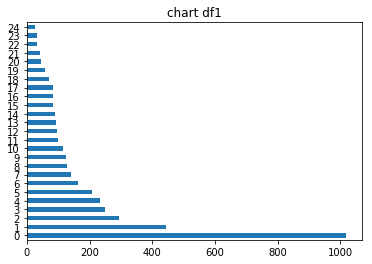

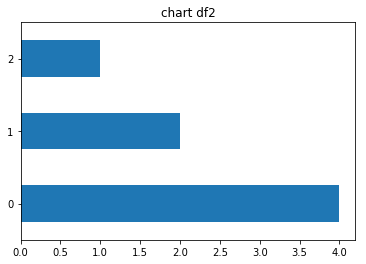

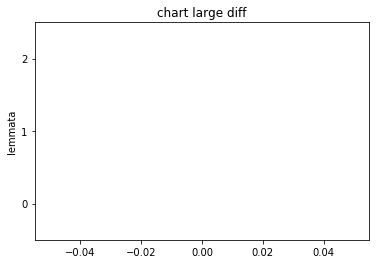

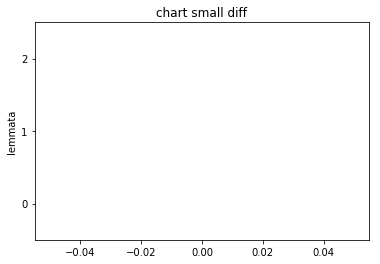

In [11]:
from chaininglib.utils.dfops import get_rank_diff
from chaininglib.ui.dfui import display_df

# For this case study, you need to run the previous case study first, because it generates a function we need here

# Use lexica and corpora from same period
base_lexicon1="molex"
corpus_to_search1="chn-extern"

base_lexicon2="molex"
corpus_to_search2="zeebrieven"

# TODO: Take part of corpus., instead of all nouns?

pos="NOU.*"

# build frequency tables of two corpora

df_frequency_list1 = get_frequency_list_given_a_corpus(base_lexicon1, pos, corpus_to_search1)
# sort and display
df_top25_descending = df_frequency_list1.sort_values(ascending=False,by=['token count']).head(25)
df_top25_ascending =  df_frequency_list1.sort_values(ascending=True, by=['rank']).head(25)
display_df( df_top25_ascending )
print(type(df_top25_descending['token count']))
display_df( df_top25_descending['token count'], labels='chart df1', mode='chart' )

df_frequency_list2 = get_frequency_list_given_a_corpus(base_lexicon2, pos, corpus_to_search2)
# sort and display
df_top25_descending = df_frequency_list2.sort_values(ascending=False,by=['token count']).head(25)
df_top25_ascending =  df_frequency_list2.sort_values(ascending=True, by=['rank']).head(25)
display_df( df_top25_ascending )
display_df( df_top25_descending['token count'], labels='chart df2', mode='chart' )


# TODO: lemmata tonen die in 1 of 2 ontbreken

# compute the rank diff of lemmata in frequency tables

# sort and display
df_rankdiffs = get_rank_diff(df_frequency_list1, df_frequency_list2)

display_df(df_rankdiffs.sort_values(by=['rank_diff']).head(25))

df_top25_descending = df_rankdiffs.sort_values(ascending=False, by=['rank_diff']).head(25)
display_df( df_top25_descending['rank_diff'], labels='chart large diff', mode='chart' )

df_top25_ascending = df_rankdiffs.sort_values(ascending=True, by=['rank_diff']).head(25)
display_df( df_top25_ascending['rank_diff'], labels='chart small diff', mode='chart' )

### Search corpus for wordforms of lemma not included in lexicon <a class="anchor" id="corpus-wordforms-not-lexicon"></a>

In [25]:
from chaininglib.search.LexiconQuery import *
from chaininglib.search.CorpusQuery import *
from chaininglib.ui.dfui import display_df

# Let's build a function to do the job:
# The function will require a lexicon name and a part-of-speech to limit the search to, and the name of a corpus to be searched.
# It will return a Pandas DataFrame associating lemmata to their paradigms ('known_wordforms' column) and
# missing wordforms found in the corpus ('unknown_wordforms' column).

def get_missing_wordforms(lexicon_lemmas, lexicon_wordforms, lexicon_pos, corpus_pos, corpus):    
    
    print('Finding missing wordforms in a lexicon can take a long time...');
    
    # LEXICON: 
    # get a lemmata list having a given part-of-speech
    
    lq = create_lexicon(lexicon_lemmas).pos(lexicon_pos).search()
    df_lexicon = lq.kwic()
    
    # Put the results into an array, so we can loop through the list of lemmata
    lexicon_lemmata_arr = [w.lower() for w in df_lexicon["writtenForm"]][-50:]
    
    # Test array, instead of querying Molex
    #lexicon_lemmata_arr = ["denken", "doen", "hebben", "maken"]
    
    # Prepare the output:
    # instantiate a DataFrame for storing lemmata and mssing wordforms
    df_enriched_lexicon = pd.DataFrame(index=lexicon_lemmata_arr, columns=['lemma', 'pos', 'known_wordforms', 'unknown_wordforms'])
    df_enriched_lexicon.index.name = 'lemmata'
    
    # CORPUS: 
    # loop through the lemmata list, query the corpus for each lemma, 
    # and compute paradigms differences between both

    
    # loop through the lemmata list
    # and query the corpus for occurances of the lemmata
    
    # It's a good idea to work with more than one lemma at the time (speed)!
    nr_of_lemmata_to_query_atonce = 100
    
    for i in range(0, len(lexicon_lemmata_arr), nr_of_lemmata_to_query_atonce):
        
        # slice to small array of lemmata to query at once
        small_lemmata_arr = lexicon_lemmata_arr[i : i+nr_of_lemmata_to_query_atonce]
        
        # join set of lemmata to send them in a query all at once
        # beware: single quotes need escaping
        lemmata_list = "|".join(small_lemmata_arr).replace("'", "\\\\'")
        print("Querying lemmata %i-%i of %i from corpus." % (i, i+nr_of_lemmata_to_query_atonce, len(lexicon_lemmata_arr) ))
        cq = create_corpus(corpus).pattern(r'[lemma="' + lemmata_list + r'" & pos="'+corpus_pos+'"]').search()
        df_corpus = cq.kwic()
        
        # if the corpus gave results,
        # query the lexicon for the same lemmata
        # and compare the paradigms!
        
        if (len(df_corpus)>0):
            small_lemmata_set = set(small_lemmata_arr)
            for one_lemma in small_lemmata_set: 
                print(one_lemma)
                # look up the known wordforms in the lexicon
                ql = create_lexicon(lexicon_wordforms).lemma(one_lemma).search()
                df_known_wordforms = ql.kwic()
                
                # we have a lexicon paradigm to compare, do the job now
                if (len(df_known_wordforms) != 0):
                    print(df_known_wordforms)
                    # gather the lexicon wordforms in a set
                    known_wordforms = set( df_known_wordforms['wordform'].str.lower() )
                    
                    # gather the corpus wordforms (of the same lemma) in a set too
                    corpus_lemma_filter = (df_corpus['lemma 0'] == one_lemma)
                    corpus_wordforms = set( (df_corpus[ corpus_lemma_filter ])['word 0'].str.lower() )
                    
                    # Now compute the differences:
                    # gather in a set all the corpus wordforms that cannot be found in the lexicon wordforms 
                    unknown_wordforms = corpus_wordforms.difference(known_wordforms)

                    # If we found some missing wordforms, add the results to the output!
                    
                    if (len(unknown_wordforms) !=0):                        
                        # The index of our results will be a key consisting of lemma + part-of-speech
                        # Part-of-speech is needed to distinguish homonyms with different grammatical categories.
                        # Of course, we need to take glosses into account too to do a truely correct job
                        # But we didn't do it here
                        key = one_lemma + lexicon_pos
                        df_enriched_lexicon.at[key, 'lemma'] = one_lemma
                        df_enriched_lexicon.at[key, 'pos'] = lexicon_pos
                        df_enriched_lexicon.at[key, 'known_wordforms'] = known_wordforms
                        df_enriched_lexicon.at[key, 'unknown_wordforms'] = unknown_wordforms
                
    # return non-empty results, t.i. cases in which we found some wordforms
    return df_enriched_lexicon[ df_enriched_lexicon['unknown_wordforms'].notnull() ]


# Run the function!

lexicon_lemmas="molex"
lexicon_wordforms="molex"
corpus_to_search="chn-extern"


df = get_missing_wordforms(lexicon_lemmas, lexicon_wordforms, "VERB", "VRB.*", corpus_to_search)

# After such a heavy process, it's a good idea to save the results

df.to_csv( "missing_wordforms.csv", index=False)

display_df(df)


Finding missing wordforms in a lexicon can take a long time...
Querying lemmata 0-100 of 50 from corpus.                           


...Searching chn-extern at result 241000...                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                             

...Searching chn-extern at result 363000...                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                             

                                                     Gender  \
0                                                             
1                                                             
2                                                             
3                                                             
4                                                             
5                                                             
6                                                             
7                                                             
8                                                             
9                                                             
10                                                            
11                                                            
12                                                            
13                                                            
14                                                     

                                                          Gender  \
0                                                                  
1                                                                  
2                                                                  
3                                                                  
4                                                                  
5                                                                  
6                                                                  
7                                                                  
8                                                                  
9                                                                  
10                                                                 
11                                                                 
12                                                                 
13                                              

zweden
                                                      Number hyphenation  \
0   http://universaldependencies.org/u/feat/Number.html#Plur   zweed/den   
1   http://universaldependencies.org/u/feat/Number.html#Plur     zwe/den   
2   http://universaldependencies.org/u/feat/Number.html#Sing      zweedt   
3   http://universaldependencies.org/u/feat/Number.html#Sing    zweed/de   
4   http://universaldependencies.org/u/feat/Number.html#Sing       zweed   
5   http://universaldependencies.org/u/feat/Number.html#Sing      zweedt   
6   http://universaldependencies.org/u/feat/Number.html#Plur     zwe/den   
7   http://universaldependencies.org/u/feat/Number.html#Sing    zweed/de   
8   http://universaldependencies.org/u/feat/Number.html#Plur   zweed/den   
9   http://universaldependencies.org/u/feat/Number.html#Sing      zweedt   
10  http://universaldependencies.org/u/feat/Number.html#Sing    zweed/de   
11  http://universaldependencies.org/u/feat/Number.html#Sing       zweed   
12  h

                                                      Gender  \
0                                                              
1                                                              
2                                                              
3                                                              
4                                                              
5                                                              
6                                                              
7                                                              
8                                                              
9                                                              
10                                                             
11                                                             
12                                                             
13                                                             
14                                      

                                                      Number  hyphenation  \
0   http://universaldependencies.org/u/feat/Number.html#Plur   zwa/ve/len   
1   http://universaldependencies.org/u/feat/Number.html#Sing   zwa/vel/de   
2   http://universaldependencies.org/u/feat/Number.html#Sing      zwa/vel   
3   http://universaldependencies.org/u/feat/Number.html#Plur  zwa/vel/den   
4   http://universaldependencies.org/u/feat/Number.html#Sing     zwa/velt   
5   http://universaldependencies.org/u/feat/Number.html#Sing      zwa/vel   
6   http://universaldependencies.org/u/feat/Number.html#Sing   zwa/vel/de   
7   http://universaldependencies.org/u/feat/Number.html#Plur  zwa/vel/den   
8   http://universaldependencies.org/u/feat/Number.html#Plur   zwa/ve/len   
9   http://universaldependencies.org/u/feat/Number.html#Sing     zwa/velt   
10  http://universaldependencies.org/u/feat/Number.html#Plur  zwa/vel/den   
11  http://universaldependencies.org/u/feat/Number.html#Sing     zwa/velt   

                                                      Number     hyphenation  \
0   http://universaldependencies.org/u/feat/Number.html#Plur  maak/ten zwart   
1   http://universaldependencies.org/u/feat/Number.html#Sing   zwart/maak/te   
2   http://universaldependencies.org/u/feat/Number.html#Sing     maakt zwart   
3   http://universaldependencies.org/u/feat/Number.html#Sing   zwart/maak/te   
4   http://universaldependencies.org/u/feat/Number.html#Plur    ma/ken zwart   
5   http://universaldependencies.org/u/feat/Number.html#Plur    zwart/ma/ken   
6   http://universaldependencies.org/u/feat/Number.html#Plur  zwart/maak/ten   
7   http://universaldependencies.org/u/feat/Number.html#Sing     zwart/maakt   
8   http://universaldependencies.org/u/feat/Number.html#Sing      maak zwart   
9   http://universaldependencies.org/u/feat/Number.html#Sing   zwart/maak/te   
10  http://universaldependencies.org/u/feat/Number.html#Sing      maak zwart   
11  http://universaldependencies.org/u/f

zwieren
                                                      Number hyphenation  \
0   http://universaldependencies.org/u/feat/Number.html#Plur    zwie/ren   
1   http://universaldependencies.org/u/feat/Number.html#Sing    zwier/de   
2   http://universaldependencies.org/u/feat/Number.html#Sing       zwier   
3   http://universaldependencies.org/u/feat/Number.html#Plur   zwier/den   
4   http://universaldependencies.org/u/feat/Number.html#Sing      zwiert   
5   http://universaldependencies.org/u/feat/Number.html#Sing       zwier   
6   http://universaldependencies.org/u/feat/Number.html#Sing    zwier/de   
7   http://universaldependencies.org/u/feat/Number.html#Plur   zwier/den   
8   http://universaldependencies.org/u/feat/Number.html#Plur    zwie/ren   
9   http://universaldependencies.org/u/feat/Number.html#Sing      zwiert   
10  http://universaldependencies.org/u/feat/Number.html#Plur   zwier/den   
11  http://universaldependencies.org/u/feat/Number.html#Sing      zwiert   
12  

                                                      Gender  \
0                                                              
1                                                              
2                                                              
3                                                              
4                                                              
5                                                              
6                                                              
7                                                              
8                                                              
9                                                              
10                                                             
11                                                             
12                                                             
13                                                             
14                                      

zuiveren
                                                      Number  hyphenation  \
0   http://universaldependencies.org/u/feat/Number.html#Plur   zui/ve/ren   
1   http://universaldependencies.org/u/feat/Number.html#Sing   zui/ver/de   
2   http://universaldependencies.org/u/feat/Number.html#Sing      zui/ver   
3   http://universaldependencies.org/u/feat/Number.html#Plur  zui/ver/den   
4   http://universaldependencies.org/u/feat/Number.html#Sing     zui/vert   
5   http://universaldependencies.org/u/feat/Number.html#Sing      zui/ver   
6   http://universaldependencies.org/u/feat/Number.html#Sing   zui/ver/de   
7   http://universaldependencies.org/u/feat/Number.html#Plur  zui/ver/den   
8   http://universaldependencies.org/u/feat/Number.html#Plur   zui/ve/ren   
9   http://universaldependencies.org/u/feat/Number.html#Sing     zui/vert   
10  http://universaldependencies.org/u/feat/Number.html#Plur  zui/ver/den   
11  http://universaldependencies.org/u/feat/Number.html#Sing     zu

                                                      Gender  \
0                                                              
1                                                              
2                                                              
3                                                              
4                                                              
5                                                              
6                                                              
7                                                              
8                                                              
9                                                              
10                                                             
11                                                             
12                                                             
13                                                             
14                                      

zwengelen
                                                      Number   hyphenation  \
0   http://universaldependencies.org/u/feat/Number.html#Plur   zwen/ge/len   
1   http://universaldependencies.org/u/feat/Number.html#Sing   zwen/gel/de   
2   http://universaldependencies.org/u/feat/Number.html#Sing      zwen/gel   
3   http://universaldependencies.org/u/feat/Number.html#Plur  zwen/gel/den   
4   http://universaldependencies.org/u/feat/Number.html#Sing     zwen/gelt   
5   http://universaldependencies.org/u/feat/Number.html#Sing      zwen/gel   
6   http://universaldependencies.org/u/feat/Number.html#Sing   zwen/gel/de   
7   http://universaldependencies.org/u/feat/Number.html#Plur  zwen/gel/den   
8   http://universaldependencies.org/u/feat/Number.html#Plur   zwen/ge/len   
9   http://universaldependencies.org/u/feat/Number.html#Sing     zwen/gelt   
10  http://universaldependencies.org/u/feat/Number.html#Plur  zwen/gel/den   
11  http://universaldependencies.org/u/feat/Number.htm

zwalken
                                                      Number hyphenation  \
0   http://universaldependencies.org/u/feat/Number.html#Plur   zwalk/ten   
1   http://universaldependencies.org/u/feat/Number.html#Sing      zwalkt   
2   http://universaldependencies.org/u/feat/Number.html#Plur    zwal/ken   
3   http://universaldependencies.org/u/feat/Number.html#Sing    zwalk/te   
4   http://universaldependencies.org/u/feat/Number.html#Plur    zwal/ken   
5   http://universaldependencies.org/u/feat/Number.html#Sing       zwalk   
6   http://universaldependencies.org/u/feat/Number.html#Sing      zwalkt   
7   http://universaldependencies.org/u/feat/Number.html#Sing    zwalk/te   
8   http://universaldependencies.org/u/feat/Number.html#Plur   zwalk/ten   
9   http://universaldependencies.org/u/feat/Number.html#Plur    zwal/ken   
10  http://universaldependencies.org/u/feat/Number.html#Sing    zwalk/te   
11  http://universaldependencies.org/u/feat/Number.html#Sing       zwalk   
12  

                                                      Number  hyphenation  \
0   http://universaldependencies.org/u/feat/Number.html#Plur     zwel/len   
1   http://universaldependencies.org/u/feat/Number.html#Sing         zwol   
2   http://universaldependencies.org/u/feat/Number.html#Sing         zwel   
3   http://universaldependencies.org/u/feat/Number.html#Plur     zwol/len   
4   http://universaldependencies.org/u/feat/Number.html#Sing        zwelt   
5   http://universaldependencies.org/u/feat/Number.html#Sing         zwel   
6   http://universaldependencies.org/u/feat/Number.html#Sing         zwol   
7   http://universaldependencies.org/u/feat/Number.html#Plur     zwol/len   
8   http://universaldependencies.org/u/feat/Number.html#Plur     zwel/len   
9   http://universaldependencies.org/u/feat/Number.html#Sing        zwelt   
10  http://universaldependencies.org/u/feat/Number.html#Plur     zwol/len   
11  http://universaldependencies.org/u/feat/Number.html#Sing        zwelt   

zweefvliegen
                                                          Gender  \
0                                                                  
1                                                                  
2                                                                  
3                                                                  
4                                                                  
5                                                                  
6                                                                  
7                                                                  
8                                                                  
9                                                                  
10                                                                 
11                                                                 
12                                                                 
13                                 

                                                      Gender  \
0                                                              
1                                                              
2                                                              
3                                                              
4                                                              
5                                                              
6                                                              
7                                                              
8                                                              
9                                                              
10                                                             
11                                                             
12                                                             
13                                                             
14                                      

                                                      Number hyphenation  \
0   http://universaldependencies.org/u/feat/Number.html#Plur    zwet/sen   
1   http://universaldependencies.org/u/feat/Number.html#Sing    zwets/te   
2   http://universaldependencies.org/u/feat/Number.html#Sing       zwets   
3   http://universaldependencies.org/u/feat/Number.html#Plur   zwets/ten   
4   http://universaldependencies.org/u/feat/Number.html#Sing      zwetst   
5   http://universaldependencies.org/u/feat/Number.html#Sing       zwets   
6   http://universaldependencies.org/u/feat/Number.html#Sing    zwets/te   
7   http://universaldependencies.org/u/feat/Number.html#Plur   zwets/ten   
8   http://universaldependencies.org/u/feat/Number.html#Plur    zwet/sen   
9   http://universaldependencies.org/u/feat/Number.html#Sing      zwetst   
10  http://universaldependencies.org/u/feat/Number.html#Plur   zwets/ten   
11  http://universaldependencies.org/u/feat/Number.html#Sing      zwetst   
12  http://u

                                                      Number      hyphenation  \
0   http://universaldependencies.org/u/feat/Number.html#Sing      zwart/kijkt   
1   http://universaldependencies.org/u/feat/Number.html#Sing       keek zwart   
2   http://universaldependencies.org/u/feat/Number.html#Sing      kijkt zwart   
3   http://universaldependencies.org/u/feat/Number.html#Plur     ke/ken zwart   
4   http://universaldependencies.org/u/feat/Number.html#Plur    kij/ken zwart   
5   http://universaldependencies.org/u/feat/Number.html#Sing       keek zwart   
6   http://universaldependencies.org/u/feat/Number.html#Plur     ke/ken zwart   
7   http://universaldependencies.org/u/feat/Number.html#Plur    zwart/kij/ken   
8   http://universaldependencies.org/u/feat/Number.html#Sing       kijk zwart   
9   http://universaldependencies.org/u/feat/Number.html#Plur     ke/ken zwart   
10  http://universaldependencies.org/u/feat/Number.html#Sing       kijk zwart   
11  http://universaldependen

21  http://universaldependencies.org/u/pos/VERB  
zwartvissen
                                                      Number     hyphenation  \
0   http://universaldependencies.org/u/feat/Number.html#Sing      vist zwart   
1   http://universaldependencies.org/u/feat/Number.html#Plur   zwart/vis/ten   
2   http://universaldependencies.org/u/feat/Number.html#Sing    vis/te zwart   
3   http://universaldependencies.org/u/feat/Number.html#Plur   vis/sen zwart   
4   http://universaldependencies.org/u/feat/Number.html#Plur   vis/ten zwart   
5   http://universaldependencies.org/u/feat/Number.html#Sing    zwart/vis/te   
6   http://universaldependencies.org/u/feat/Number.html#Sing    zwart/vis/te   
7   http://universaldependencies.org/u/feat/Number.html#Sing    vis/te zwart   
8   http://universaldependencies.org/u/feat/Number.html#Sing       zwart/vis   
9   http://universaldependencies.org/u/feat/Number.html#Plur   vis/ten zwart   
10  http://universaldependencies.org/u/feat/Number.html#Si

                                                      Number hyphenation  \
0   http://universaldependencies.org/u/feat/Number.html#Plur     zwe/ven   
1   http://universaldependencies.org/u/feat/Number.html#Sing    zweef/de   
2   http://universaldependencies.org/u/feat/Number.html#Sing       zweef   
3   http://universaldependencies.org/u/feat/Number.html#Plur   zweef/den   
4   http://universaldependencies.org/u/feat/Number.html#Sing      zweeft   
5   http://universaldependencies.org/u/feat/Number.html#Sing       zweef   
6   http://universaldependencies.org/u/feat/Number.html#Sing    zweef/de   
7   http://universaldependencies.org/u/feat/Number.html#Plur   zweef/den   
8   http://universaldependencies.org/u/feat/Number.html#Plur     zwe/ven   
9   http://universaldependencies.org/u/feat/Number.html#Sing      zweeft   
10  http://universaldependencies.org/u/feat/Number.html#Plur   zweef/den   
11  http://universaldependencies.org/u/feat/Number.html#Sing      zweeft   
12  http://u

                                                          Gender  \
0                                                                  
1                                                                  
2                                                                  
3                                                                  
4                                                                  
5                                                                  
6                                                                  
7                                                                  
8                                                                  
9                                                                  
10                                                                 
11                                                                 
12                                                                 
13                                              

20  http://universaldependencies.org/u/pos/VERB  


,lemma,pos,known_wordforms,unknown_wordforms
lemmata,,,,
zullenVERB,zullen,VERB,"{zult, zou, zal, zul, zullend, zouden, zullen}","{zoude, zál}"
zwelenVERB,zwelen,VERB,"{zweel, zweelden, zwelend, zweelt, zweelde, zwelen, gezweeld}",{zwelde}


## Treebanks

### Treebank search <a class="anchor" id="treebank-search"></a>

In [ ]:
from chaininglib.search.TreebankQuery import *


print ("search...")

tbq = create_treebank().pattern("xquery //node[@cat='pp' and node[@cat='ap' and node[@cat='np']]]").search()

print ("get XML...")

xml = tbq.xml()
print(xml)

print ("get trees and their string representations...")

trees = tbq.trees()

for tree in trees:
    display(tree.toString())

df = tbq.kwic()
    
display(df)

### Which kind of nouns are used in a prepositional complement of the verb *geven* ? <a class="anchor" id="treebank-objects-geven"></a>

In [ ]:
from chaininglib.search.TreebankQuery import *


print ("search...")

tbq = create_treebank().pattern(r'xquery //node[node[@rel="hd" and @pt="ww" and @root="geven"] and node[@rel="obj1" and @pt="n"]]').search()


print ("get list of nouns which are part of an PP, as argument of predicate 'geven'...")

trees = tbq.trees()

list_of_nouns = []
for tree in trees:
    nouns = tree.extract(['pp', 'np'])
    list_of_nouns = list_of_nouns + nouns
    

display(list_of_nouns)
    
df = tbq.kwic(align_lemma='geven')
display(df)